# <center>Tarea 1</center>
Integrantes:
- Romina Sepúlveda
- Sebastián Urbina

## Pregunta 1

### Pregunta 1.1

Para esta tarea se eligió a $\textbf{Argentina, Bolivia, Chile y Perú}$. La razón principal fue que son países vecinos y de cultura similar.

## Argentina

El sistema de de Salud Argentino se fragmenta en, Público, de la Seguridad Social y Privado.Alrededor de un 37,6 % de la población se atiende por el sistema público y un 51,52 % por obras sociales.

- Según un informe de 2017, Argentina cuenta con 17.845 establecimientos asistenciales en total.
- Cuenta con 19,3 respiradores artificiales por cada 100 mil habitantes.
-  4.5 Camas cada 1000 habitantesPerú 1.5, Chile 2)
- Según INE hasta el 1 de julio de 2020 posee una población estimada de 45.376.763 habitantes
- Posee una densidad poblacional de 16 habitantes por $km^{2}$

### Principales medidas tomadas por Argentina:
- 06/03/2020: Segundo caso confirmado de COVID19
- 16/03/2020: Cierre de Fronteras
- 18/03/2020: Construcción de 12 Hospitales Modulares de Emergencia
- 19/03/2020: Aislamiento social, preventivo y obligatorio para toda la población
- 31/03/2020: Prórroga del aislamiento social, preventivo y obligatorio(hasta 12/04)
- 01/04/2020: Prórroga del cierre de fronteras, de la asistencia a argentinos en el exterior y repatriación paulatina+
- 26/04/2020: Prórroga del cierre de fronteras(hasta 10 de mayo)
- 10/05/2020: Prórroga del aislamiento hasta el 24 de mayo inclusive y nuevas excepciones


## Bolivia

El sistema de salud Boliviano garantiza el acceso universal, equitativo, oportuno y gratuito a la atención integral en salud de la población boliviana. Es de carácter universal, gratuito, equitativo, intracultural, intercultural y participativo. El sistema esta compuesto por 3 grandes sectores y los cuales son; el sector público, el sector privado y el sector de seguridad social.

- Hasta el año 2019 contaba con 3253 centros de salud(hospitales 1r,2do,3r orden).
- Cuenta con 1.28 camas cada 100 mil habitantes.
- Cuenta con 1.61 médicos cada 100 mil habitantes.
- Hasta 18 de mayo de 2018 posee una población estimada de 11.216.000 habitantes
- Posee una densidad poblacional de 10 habitantes por $km^{2}$

### Principales medidas tomadas por Bolivia:
- 11/03/20: Segundo caso confirmado de COVID19
- 13/03/20: Suspención de labores educativos y vuelos desde y hacia Europa
- 21/03/20: Se declara cuarentena total por 14 días
- 25/03/20: Se declara estado de emergencia 
- 14/04/20: Se extiende cuarentena total hasta 31/04
- 29/04/20: Se extiende cuarentena total hasta 11/05
- 11/05/20: Comienzan a regir cuarentenas dinámicas

## Chile:

La atención de salud de las personas chilenas está a cargo de un sistema público y privado. FONASA es el ente financiero encargado de recaudar, administrar y distribuir los dineros estatales destinados a salud. El sector privado está representado por las ISAPRE (Instituciones de Salud Previsional) o aseguradoras de salud.

- Según un reporte del Ministerio de Salud de Chile el total de establecimientos de salud es de 3813.

- Según reportes del gobierno, Chile dispone de 3300 ventiladores mecánicos, lo que corresponde a 16.9 por cada 100.000 habitantes.

- Chile cuenta con 2,2 camas por 1000 habitantes según datos del Banco Mundial (al 2013) y con 2,5 médicos por 1000 habitantes según datos del Banco Mundial (al 2018)

- Según el INE hasta 30 de junio de 2020, posee una población estimada de 19.458.310 habitantes

- Su densidad poblacional de 25 habitantes por $km^{2}$

### Principales medidas tomadas por Chile:
- 3/03/2020: Se registra el primer caso en el país.

- 15/03/2020: Cuarentena obligatoria para cualquier miembro de una comunidad educativa que tenga un familiar directo con contagio confirmado. Cuarentena obligatoria del establecimiento educacional completo en caso de existir dos o más casos de estudiantes con contagio confirmado.

- 15/03/2020: Prohibidos todos los eventos públicos con más de 50 personas en todo el país.

- 15/03/2020: Personas provenientes de países calificados de Alto Riesgo por la Organización Mundial de la Salud, tendrán que estar en una cuarentena de 14 días al ingresar al país.

- 15/03/2020: Aduanas Sanitarias en todas las fronteras terrestres.

- 15/03/2020: Cuarentena total en Caleta Tortel.

- 15/03/2020: Multas y penas de cárcel por incumplimiento de cuarentenas.

- 15/03/2020: Prohibición de eventos públicos con más de 200 personas.

- 18/03/2020: Se decreta Estado de Catástrofe.

- 18/03/2020: Cierre total de fronteras aéreas, marítimas y terrestres.

- 22/03/2020: Se declara el Toque de Queda entre las 22:00 y las 05:00 horas en todo el territorio nacional, sin un plazo de término.

- 26/03/2020: Comienzo de cuarentenas alternadas por comunas en la provincia de Santiago y zonas del país con mayores tasas de contagio.

- 15/05/2020: Cuarentena total para la provincia de Santiago (extendida hasta la fecha).

## Perú

El Sistema de Salud del Perú se fragmenta en público (Ministerio de Salud, EsSalud- Seguro Social de Salud, Sanidad de Fuerzas Armadas, Policías y Municipios) y privado.

Según un informe de 2016 el total de establecimientos de salud es de 10.922. 

- A la fecha 13/Abril/2020 informaciones del gobierno peruano detallan un stock de 276 equipos de respiradores mecánicos destinados a esta emergencia, que corresponden a 0,8 por cada 100.000 habitantes.

- Peru cuenta con 1,6 Camas cada 1000 habitantes según datos del Banco Mundial (al 2014) y con 1,3 Médicos cada 1000 habitantes según datos del Banco Mundial (al 2016).

- Hasta el 30 de junio de 2019, segun INE posee una población estimada de 32.131.400 habitantes.
- Su densidad poblacional de 25 habitantes por $km^{2}$

### Principales medidas tomadas por Peru:

- 6/03/2020: Se registra el primer caso en el país.

- 12/03/2020: Creación de la Comisión Multisectorial contra el coronavirus.

- 13/03/2020: Se suspenden las actividades académicas en Colegios y casas de estudio superiores (Universidades e Institutos).

- 13/03/2020: Prohibición de espectáculos de toda índole con más de 300 asistentes.

- 15/03/2020: Se decreta Estado de Emergencia, tras diversas extensiones el término actual es el día 30/06/2020.

- 16/03/2020: Se suspenden vuelos provenientes de Asia y Europa.

- 16/03/2020: Se declara Cuarentena, tras diversas extensiones el término actual es el día 30/06/2020.

- 17/03/2020: Se decreta cierre total de fronteras (terrestre, marítima y aérea). Con autorización de vuelos humanitarios para repatriar a peruanos del extranjero.

- 18/03/2020: Se decreta toque de queda a nivel nacional de 20:00 horas a 5:00 horas.

- 18/03/2020: Se decreta la prohibición del uso de vehículos particulares a excepción de aquellos necesarios para la prestación de algunos servicios esenciales.

- 26/03/2020: Se extiende el horario de toque de queda desde las 18:00 horas (6:00 p.m.) a las 5:00 horas (5:00 a.m.) en regiones más afectadas.

- 02/04/2020: Se decreta que salvoconductos serán diferenciados, que varones y mujeres saldrán por separado; los varones los días lunes, miércoles y viernes y las mujeres los días martes, jueves y sábado, y los días domingo, tanto varones y mujeres, no pondrán circular durante el día, exceptuando a aquellas personas con permiso para ello.

- 03/04/2020: Se decreta el uso obligatorio de mascarilla para circular por las vías de uso público.

- 10/04/2020: Se suspende la salida diferenciada por género.

Referencias: 
- https://es.wikipedia.org/wiki/Sistema_de_Salud_de_Bolivia#Hospitales
- https://www.sac.org.ar/wp-content/uploads/2018/04/el-sistema-de-salud-argentino.pdf
- https://es.wikipedia.org/wiki/Cuarentena_de_Bolivia_de_2020
- https://datosmacro.expansion.com/paises/argentina#:~:text=Argentina%2C%20con%20una%20poblaci%C3%B3n%20de,y%20su%20moneda%20Pesos%20argentinos
-  https://datosmacro.expansion.com/demografia/poblacion/bolivia#:~:text=Bolivia%20tiene%20una%20densidad%20de,10%20habitantes%20por%20Km2.
- https://es.wikipedia.org/wiki/Seguro_Social_de_Salud_del_Per%C3%BA
- https://es.wikipedia.org/wiki/Salud_en_el_Per%C3%BA
- https://gestion.pe/economia/minsa-el-51-de-hospitales-a-nivel-nacional-con-equipamiento-obsoleto-noticia/?ref=gesr
- https://www.gob.pe/institucion/minsa/informes-publicaciones/276726-situacion-de-salud-del-peru-indicadores-basicos-2016
- https://www.latercera.com/mundo/noticia/cuantos-ventiladores-hay-por-pais/TDWY2I5PY5ASFDKY5EJLQQXIAY/
- https://datos.bancomundial.org/indicador/SH.MED.BEDS.ZS?view=chart
- https://datos.bancomundial.org/indicator/SH.MED.PHYS.ZS?view=chart
- https://datosmacro.expansion.com/paises/peru
- https://es.wikipedia.org/wiki/Cuarentena_de_Per%C3%BA_de_2020#cite_note-8
- https://es.wikipedia.org/wiki/Salud_en_Chile
- https://reportesdeis.minsal.cl/ListaEstablecimientoWebSite/
- https://www.minsal.cl/minsal-dispone-de-3-300-ventiladores-mecanicos-para-emergencia-sanitaria-por-covid-19/
- https://datos.bancomundial.org/indicador/SH.MED.BEDS.ZS?view=chart
- https://datos.bancomundial.org/indicator/SH.MED.PHYS.ZS?view=chart
- https://datosmacro.expansion.com/paises/chile
- https://es.wikipedia.org/wiki/Pandemia_de_enfermedad_por_coronavirus_de_2020_en_Chile
- https://www.latercera.com/nacional/noticia/presidente-pinera-y-medidas-ante-el-covid-19-cuarentena-para-colegios-donde-- haya-infecciones-examenes-gratuitos-en-fonasa-y-cancelacion-de-eventos-masivos/EFVHN6FCZFEIPCWBOSN5W2ND5A/
- https://www.bbc.com/mundo/noticias-america-latina-52655289

## Pregunta 1.2

Importamos las librerías a utilizar

In [52]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(gridExtra)

Definimos las variables de población para cada uno de los países escogidos

In [3]:
pob_chi <- 19458310 
pob_arg <- 45376763
pob_bol <- 11216000
pob_per <- 32131400

Leemos los datos de contagiados, fallecidos y recuperados

In [4]:
df_covid_time <- read.csv("time_series_covid19_confirmed_global.csv",sep=",",check.names=FALSE)
df_covid_deaths <- read.csv("time_series_covid19_deaths_global.csv",sep=",",check.names=FALSE)
df_covid_recovered <- read.csv("time_series_covid19_recovered_global.csv",sep=",",check.names=FALSE)

Seleccionamos la información de los países a estudiar

In [5]:
df_chi <- df_covid_time[df_covid_time$"Country/Region"=='Chile',]
df_chi_deaths <- df_covid_deaths[df_covid_deaths$"Country/Region"=='Chile',]
df_chi_recovered <- df_covid_recovered[df_covid_recovered$"Country/Region"=='Chile',]

df_arg <- df_covid_time[df_covid_time$"Country/Region"=='Argentina',]
df_arg_deaths <-df_covid_deaths[df_covid_deaths$"Country/Region"=='Argentina',]
df_arg_recovered <-df_covid_recovered[df_covid_recovered$"Country/Region"=='Argentina',]

df_bol <- df_covid_time[df_covid_time$"Country/Region"=='Bolivia',]
df_bol_deaths <-df_covid_deaths[df_covid_deaths$"Country/Region"=='Bolivia',]
df_bol_recovered <-df_covid_recovered[df_covid_recovered$"Country/Region"=='Bolivia',]

df_per <- df_covid_time[df_covid_time$"Country/Region"=='Peru',]
df_per_deaths <-df_covid_deaths[df_covid_deaths$"Country/Region"=='Peru',]
df_per_recovered <-df_covid_recovered[df_covid_recovered$"Country/Region"=='Peru',]

Definimos la función sort_df, que recibe como entrada el dataFrame de contagiados, fallecidos y recuperados, y elimina las columnas que no nos interesan y traspone los datos, para que queden en forma vertical, con las columnas, fecha, muertos y recuperados

In [6]:
sort_df <- function(df_c,df_d,df_r){
    df_c <-select(df_c, -c("Province/State","Lat","Long"))
    df_d <- select(df_d, -c("Province/State","Lat","Long"))
    df_r <-select(df_r, -c("Province/State","Lat","Long"))
    colnames(df_c)[1]<- 'Pais'
    colnames(df_d)[1]<- 'Pais'
    colnames(df_r)[1]<- 'Pais'
    df_c <- gather(df_c,c(2:ncol(df_c)),key='Fecha',value='Casos')
    df_d <- gather(df_d,c(2:ncol(df_d)),key='Fecha',value='Muertos')
    df_r <- gather(df_r,c(2:ncol(df_r)),key='Fecha',value='Recuperados')
    
    return(cbind(df_c,df_d[3],df_r[3]))
}

Definimos la función add_nc, que recibe como entrada un dataFrame ordenado y retorna un vector con los ''Nuevos casos por día''

In [7]:
add_nc <- function(df){
    new_cases <- rep(0,length(df$Casos))
    for(i in c(2:length(df$Casos))){
        new_cases[i] <- df$Casos[i]-df$Casos[i-1]
        }
    return(new_cases)
    }

Definimos la función add_params que recibe como entrada un dataFrame ordenado de un ciertos país y su polación, esta me selecciona los datos desde el segundo contagiado y agrega la columna con la tasa de incidencia acumulada, la tasa de incidencia por día, agregamos la columna de ''Casos nuevos por dia'' y la tasa de mortalidad acumulada.

In [8]:
add_params <- function(df,pob){
    #Consideramos desde el 2do caso en adelante
    df <- df[df$Casos>=2,]
    df <- cbind(c(1:nrow(df)),df)
    colnames(df)[1] <- 'Dias'
    df$"Casos_Nuevos" <- add_nc(df)
    #Agregamos la tasa de incidencia
    df$"Tasa_Incidencia" <- df$Casos*(100000/pob)
    #Agregamos la tasa de mortalidad
    df$"Tasa_Mortalidad" <- df$Muertos*(100000/pob)
    #Convertimos la fecha a Date, para trabajarla de mejor manera
    df$Fecha <- as.Date(df$Fecha, format = "%m/%d/%y")
    
    return(df)
}

Aplicamos las funciones definidas a nuestros datos, para obtener dataFrames ordenados, con los datos que necesitamos

In [9]:
df_chi <- sort_df(df_chi,df_chi_deaths,df_chi_recovered)
df_chi <- add_params(df_chi,pob_chi)

df_arg <- sort_df(df_arg,df_arg_deaths,df_arg_recovered)
df_arg <- add_params(df_arg,pob_arg)

df_bol <- sort_df(df_bol,df_bol_deaths,df_bol_recovered)
df_bol <- add_params(df_bol,pob_bol)

df_per <- sort_df(df_per,df_per_deaths,df_per_recovered)
df_per <- add_params(df_per,pob_per)

Unimos los dataFrames de los 4 paises 

In [10]:
df_final <- rbind(df_chi,df_arg,df_bol,df_per)
df_final <- df_final[order(df_final$Dias),]
head(df_final,n=5)

,Dias,Pais,Fecha,Casos,Muertos,Recuperados,Casos_Nuevos,Tasa_Incidencia,Tasa_Mortalidad
,<int>,<fct>,<date>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
44,1,Chile,2020-03-05,4,0,0,0,0.020556770,0
451,1,Argentina,2020-03-06,2,0,0,0,0.004407542,0
502,1,Bolivia,2020-03-11,2,0,0,0,0.017831669,0
472,1,Peru,2020-03-08,6,0,0,0,0.018673323,0
45,2,Chile,2020-03-06,4,0,0,0,0.020556770,0


Ya que tenemos un dataFrame con los datos de contiago de los 4 paises seleccionados desde el 2do caso, graficamos la evolución de los casos en función del tiempo, desde el día del segundo caso de cada país

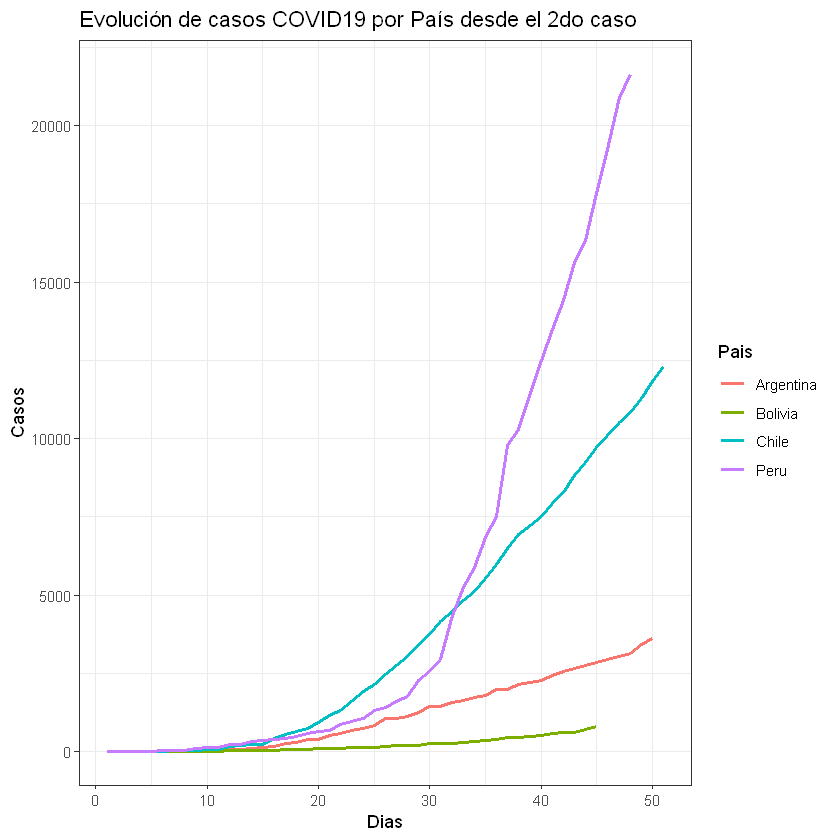

In [53]:
graph1 <- ggplot(df_final) + geom_line(aes(x = Dias, y = Casos, col = Pais), size=1, alpha = 1) + ggtitle("Evolución de casos COVID19 por País desde el 2do caso") + theme_bw()

ggsave(plot = graph1, width = w*7, height = 8, dpi = 300, filename = "graph1.2.pdf")
graph1

En primer lugar, es importante considerar para el análisis de este grafico las diferencias significativas existentes en las poblaciones. Es lógico pensar que un numero mayor de contagios total podría deberse a que el país tiene mayor población. Para ello podemos analizar por duplas, considerando las poblaciones similares en Perú – Argentina y aun que menos cercanas Chile – Bolivia.

Observamos que evidentemente el país que presenta mayor número de contagiados totales uno con población mayor dentro de la muestra: Perú. Sin embargo, llama la atención debido a que Perú es catalogado internacionalmente como uno de los países más restrictivos en cuanto a normas por covid-19 de Latinoamérica. Si comparamos las curvas de Perú con Argentina quien tiene una población más cercana y aún mayor, podemos ver que difieren bastante pese a que Argentina ha adoptado medidas similares.

Esto puede deberse a la situación económica de cada país y el cumplimiento efectivo de estas normas (en donde influyen diversos factores como la educación, por ejemplo). Argentina es la economía número 26 por volumen del PIB, en cambió Perú la número 50. Argentina realiza un gasto público de un 5,5% del PIB en educación, en cambio Perú solo de un 3,7. 
Otros factores sobre la caracterización de la población son importantes, por ejemplo, datos de la última encuesta nacional de hogares de Perú de 2019 indican que solo el 21,9% de hogares pobres de Perú tiene refrigeradora, lo que conlleva a que estos ciudadanos deban salir con mayor recurrencia a abastecerse de alimentos. 

En el caso de Chile, podemos observar en el gráfico que también presenta una alta cantidad de contagios totales, lo anterior se puede deber al tipo de normas aplicadas en el país. Siendo el único de estos cuatro en no aplicar por ejemplo Cuarentena obligatoria de manera rápida, ni hacerlo de manera total, sino que mediante un sistema parcializado de rotación. Además, a diferencia de Bolivia, por ejemplo, Chile no realizó suspensiones de clases de manera total a un comienzo de la Pandemia y esperó también para realizar un cierre total de fronteras. 

En el caso de comprar Chile con Bolivia es importante considerar además que Chile tiene una densidad poblacional mucho mayor.


Referencias:
- https://datos.bancomundial.org/indicator/SE.XPD.TOTL.GD.ZS
- https://www.elmostrador.cl/dia/2020/05/22/cuarentena-en-peru-5-factores-que-explican-por-que-las-medidas-de-confinamiento-no-impiden-que-sea-el-segundo-pais-de-america-latina-con-mas-casos-de-covid-19/


## Pregunta 1.3

La tasa de incidencia se define como el número de casos nuevos de una enfermedad u otra condición de salud dividido por la población en riesgo de la enfermedad (población expuesta) en un lugar específico y durante un período especifico. 

$\textbf{Interpretación epidemiológica:}$ Esta tasa permite calcular la probabilidad de que haya un cambio de estado(i.e. de no tener la enfermedad a enfermarse) es un intervalo determinado. En términos epidemiológicos, esto se denomina ''riesgo''. El riesgo es, la probabilidad de cambio de estado en una población de interés y en un intervalo dado. 

Para el caso del COVID-19 y la realización de esta tarea consideramos la Tasa de Incidencia como:

\begin{equation*}
    TI = \frac{\mbox{\# Casos confirmados País}}{\mbox{Población País}}\cdot 100.000
\end{equation*}

Fuente:
- https://www.paho.org/hq/index.php?option=com_content&view=article&id=14402:health-indicators-conceptual-and-operational-considerations-section-2&Itemid=0&showall=1&lang=es

Calculamos la Tasa de Incidencia acumulada hasta el último periodo, es decir, lo casos confirmados hasta el último dato de nuestro dataFrame por país

Rescatamos el último dato de contagiados por país

In [12]:
#Tomamos el último valor de nuestros df
acum_chi <- tail(df_chi$Casos, n=1) 
acum_arg <- tail(df_arg$Casos, n=1) 
acum_bol <- tail(df_bol$Casos, n=1)
acum_per <- tail(df_per$Casos, n=1)

Calculamos las tasas de Incidencia

In [13]:
ti_chi <- (acum_chi/pob_chi)*100000
ti_arg <- (acum_arg/pob_arg)*100000
ti_bol <- (acum_bol/pob_bol)*100000
ti_per <- (acum_per/pob_per)*100000

print(paste('Tasa de incidencia Chile: ',ti_chi))
print(paste('Tasa de incidencia Argentina: ',ti_arg))
print(paste('Tasa de incidencia Bolivia: ',ti_bol))
print(paste('Tasa de incidencia Peru: ',ti_per))

[1] "Tasa de incidencia Chile:  63.2429023897759"
[1] "Tasa de incidencia Argentina:  7.94900244426867"
[1] "Tasa de incidencia Bolivia:  7.19507845934379"
[1] "Tasa de incidencia Peru:  67.3733481889989"


## Conclusiones

Podemos observar que Chile y Perú son aquellos países con Tasas de Incidencia mayores, que recordemos también eran aquellos con mayor número de contagios confirmados totales. Sin embargo, para este caso Chile toma la delantera ya que Perú tiene muchísima mayor población total que Chile.

Se puede desprender del gráfico que Chile es el país con mayor porcentaje de la población total contagiada de estos 4 países de la muestra, seguido por Perú.

Esto podría entenderse por las medidas mencionadas en la pregunta anterior. Considerando que Chile no ha tomado medidas tan extremas durante el periodo analizado como si lo han hecho el resto de los países (cuarentena obligatoria, cancelación rápida de clases o cierres de frontera)


## Pregunta 1.4

Escogemos un periodo de tiempo de 2 semanas desde que se reportaron 200 casos

Creamos la siguiente función, que agrega una columna con la tasa de contagio a un cierto dataFrame

In [14]:
add_tc <- function(df,pob){
    #Agregamos la tasa de contagio al data frame
    df$"Tasa_Contagio" <- df$Casos-df$Muertos-df$Recuperados*(100000/pob)
    return(df)
}

Creamos una función, que recibe como parametros, el numero de contagios mínimos, el numero de semanas posterior a este ''n'' de contagios y el data frame. Esta función nos permite ''recortar'' nuestro data frame

In [15]:
week <- function(n,w,df){
    df <- df[df$Casos>n,]
    df <- df[df$Fecha>=df$Fecha[1] & df$Fecha<(df$Fecha+(w*7))[1],]
    return(df)
}

Para este caso consideraremos $w=2$ semanas desde que ocurren $n=200$ contagios

In [16]:
n = 200
w = 2

Aplicamos las funciones para los dataFrames de los países

In [17]:
df_chi2 <- week(n,w,df_chi) #Filtramos el df a w semanas desde que se producen n casos
df_chi2 <- add_tc(df_chi2,pob_chi) #Agregmaos la tasa de contagio en el periodo mencionado
df_chi2$Dias <- c(1:nrow(df_chi2)) #Agregamos una nueva columna con la tasa de contagio

df_arg2 <- week(n,w,df_arg) 
df_arg2 <- add_tc(df_arg2,pob_arg)
df_arg2$Dias <- c(1:nrow(df_arg2))

df_bol2 <- week(n,w,df_bol) 
df_bol2 <- add_tc(df_bol2,pob_bol)
df_bol2$Dias <- c(1:nrow(df_bol2))

df_per2 <- week(n,w,df_per) 
df_per2 <- add_tc(df_per2,pob_per)
df_per2$Dias <- c(1:nrow(df_per2))

Unimos todos los data frames

In [18]:
df_final2 <- rbind(df_chi2,df_arg2,df_bol2,df_per2)
df_final2 <- df_final2[order(df_final2$Dias),]

In [19]:
head(df_final2,n=5)

,Dias,Pais,Fecha,Casos,Muertos,Recuperados,Casos_Nuevos,Tasa_Incidencia,Tasa_Mortalidad,Tasa_Contagio
,<int>,<fct>,<date>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
56,1,Chile,2020-03-17,201,0,0,46,1.0329777,0.000000000,201.0000
611,1,Argentina,2020-03-22,266,4,3,108,0.5862031,0.008815084,261.9934
78,1,Bolivia,2020-04-08,210,15,2,16,1.8723252,0.133737518,194.9822
581,1,Peru,2020-03-19,234,0,1,89,0.7282596,0.000000000,233.9969
57,2,Chile,2020-03-18,238,0,0,37,1.2231278,0.000000000,238.0000


In [20]:
graph2 <- ggplot(df_final2) + geom_line(aes(x = Dias, y = Casos, col = Pais), size=1, alpha = 1) + 
                                                                                    ggtitle("Tasa de contagio acumulada desde que se superan 200 confirmados") + theme_bw()
ggsave(plot = graph2, width = w*7, height = 8, dpi = 300, filename = "graph1.4.pdf")


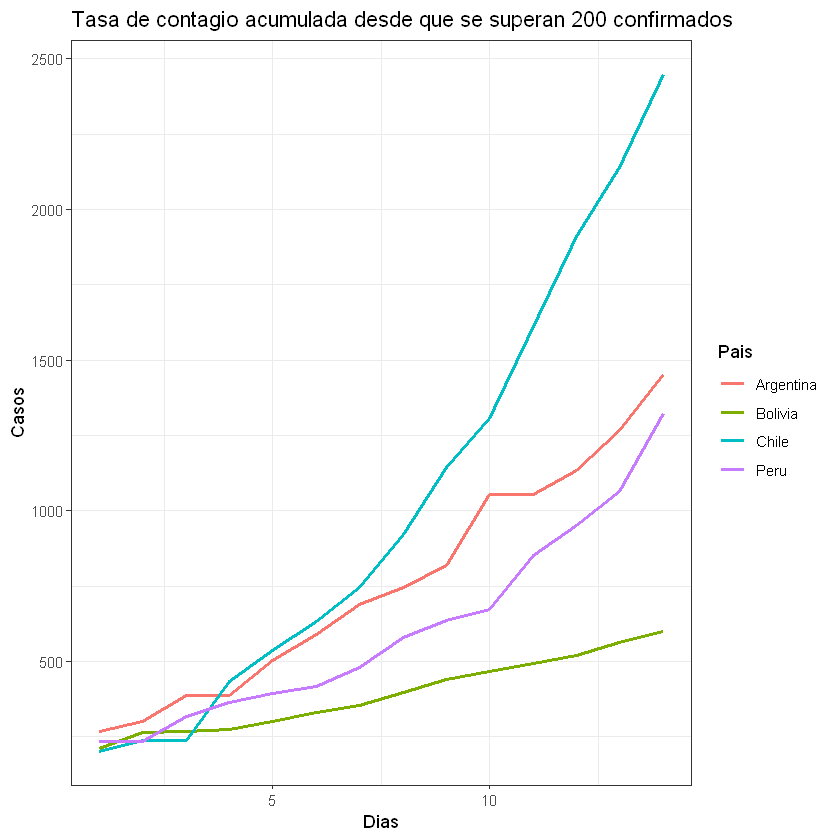

In [21]:
graph2

## Calcularemos el intervalo de confianza de la tasa de contagio como:

\begin{equation*}
    (\hat{p}-z_{\alpha/2}\sqrt{\frac{\hat{p}(100.000-\hat{p})}{n}} , \hat{p}+z_{\alpha/2}\sqrt{\frac{\hat{p}(100.000-\hat{p})}{n}})
\end{equation*}

Donde,

\begin{equation*}
    \hat{p} = \frac{\# Contagiados - \# Fallecidos - \# Recuperados}{Población}\cdot100.000 = \mbox{Tasa de Contagio}
\end{equation*}

y $n$ es la población de cada país.

Calculamos el número de contagios, fallecidos y recuperados para cada país en el intervalo de tiempo de dos semanas luego que cada país alcanza los 200 contagios confirmados

In [22]:
n_cont_chi <- sum(df_chi2$Casos_Nuevos)
n_fall_chi <- tail(df_chi2$Muertos, n=1) - df_chi2$Muertos[1]
n_rec_chi <- tail(df_chi2$Recuperados, n=1) - df_chi2$Recuperados[1]

n_cont_arg <- sum(df_arg2$Casos_Nuevos)
n_fall_arg <- tail(df_arg2$Muertos, n=1) - df_arg2$Muertos[1]
n_rec_arg <- tail(df_arg2$Recuperados, n=1) - df_arg2$Recuperados[1]

n_cont_bol <- sum(df_bol2$Casos_Nuevos)
n_fall_bol <- tail(df_bol2$Muertos, n=1) - df_bol2$Muertos[1]
n_rec_bol <- tail(df_bol2$Recuperados, n=1) - df_bol2$Recuperados[1]

n_cont_per <- sum(df_per2$Casos_Nuevos)
n_fall_per <- tail(df_per2$Muertos, n=1) - df_per2$Muertos[1]
n_rec_per <- tail(df_per2$Recuperados, n=1) - df_per2$Recuperados[1]

Obtenemos la tasa de contagio por país, que corresponde efectivamente a la proporción de casos activos por cada 100.000 habitantes

In [23]:
tc_chi <- (n_cont_chi-n_fall_chi-n_rec_chi)/(pob_chi)*100000
tc_arg <- (n_cont_arg-n_fall_arg-n_rec_arg)/(pob_arg)*100000
tc_bol <- (n_cont_bol-n_fall_bol-n_rec_bol)/(pob_bol)*100000
tc_per <- (n_cont_per-n_fall_per-n_rec_per)/(pob_per)*100000

print(paste('Tasa contagio Chile:',tc_chi))
print(paste('Tasa contagio Argentina:',tc_arg))
print(paste('Tasa contagio Bolivia:',tc_bol))
print(paste('Tasa contagio Peru:',tc_per))

[1] "Tasa contagio Chile: 10.9464799358218"
[1] "Tasa contagio Argentina: 2.15528815927218"
[1] "Tasa contagio Bolivia: 3.12054208273894"
[1] "Tasa contagio Peru: 2.32482867226451"


Utilizaremos un $\alpha = 0.05$, donde $z_{\alpha/2}$ = 1.959964

In [24]:
z_alpha2 <- qnorm(1- 0.05/2)
print(z_alpha2)

[1] 1.959964


In [25]:
int_chi <- c(tc_chi-z_alpha2*sqrt((tc_chi*(100000-tc_chi))/pob_chi), tc_chi+z_alpha2*sqrt((tc_chi*(100000-tc_chi))/pob_chi))
int_arg <- c(tc_arg-z_alpha2*sqrt((tc_arg*(100000-tc_arg))/pob_arg), tc_arg+z_alpha2*sqrt((tc_arg*(100000-tc_arg))/pob_arg))
int_bol <- c(tc_bol-z_alpha2*sqrt((tc_bol*(100000-tc_bol))/pob_bol), tc_bol+z_alpha2*sqrt((tc_bol*(100000-tc_bol))/pob_bol))
int_per <- c(tc_per-z_alpha2*sqrt((tc_per*(100000-tc_per))/pob_per), tc_per+z_alpha2*sqrt((tc_per*(100000-tc_per))/pob_per))


print(paste('Intervalo de Confianza de Tasa de Contagio para Argentina:',int_arg[1],int_arg[2]))
print(paste('Intervalo de Confianza de Tasa de Contagio para Chile:',int_chi[1],int_chi[2]))
print(paste('Intervalo de Confianza de Tasa de Contagio para Bolivia:',int_bol[1],int_bol[2]))
print(paste('Intervalo de Confianza de Tasa de Contagio para Peru:',int_per[1],int_per[2]))


[1] "Intervalo de Confianza de Tasa de Contagio para Argentina: 2.02021180625524 2.29036451228912"
[1] "Intervalo de Confianza de Tasa de Contagio para Chile: 10.4816340373125 11.411325834331"
[1] "Intervalo de Confianza de Tasa de Contagio para Bolivia: 2.79362520965667 3.44745895582122"
[1] "Intervalo de Confianza de Tasa de Contagio para Peru: 2.15811404916677 2.49154329536225"


### Conclusiones

Para el caso del análisis de la Tasa de Contagio, podemos observar que nuevamente Chile toma la delantera. Esto quiere decir que de aquellos casos confirmados el porcentaje que efectivamente está activo, o sea que puede potencialmente contagiar a otros es mayor en Chile que en el resto de los Países, lo que a su vez es preocupante porque Chile posee una población considerablemente menor con respecto a Argentina y Perú.


Si observamos los datos presentados en la parte 1 podemos observar que Chile cuenta con una capacidad mucho mayor de camas hospitalarias y de médicos por habitantes que Perú y Bolivia y aún así presenta esta diferencia importante, lo que puede representar por un lado, el poco cuidado de la población y falta de medidas estrictas de parte de las autoridades para evitar la propagación del virus o simplemente que la diferencia se deba al factor de población que influencia el cálculo, siendo Chile el segundo con menos habitantes.

Por otro lado, observamos que para que Chile cuente con una Tasa de Contagio mayor que el resto de los países puede ser también que en estos últimos el porcentaje de recuperados sea mayor, lo cual es el caso de Argentina que cuenta con mayor capacidad de ventiladores mecánicos y camas hospitalarias por habitantes que Chile, lo cual podría ayudar a aumentar el porcentaje de pacientes recuperados.

Asimismo con respecto a Bolivia, aunque es el país con menos población mantiene una tasa de contagio bastante baja e igual a Argentina y Perú que poseen una población mucho mayor. Esto se puede deber por un lado al cuidado de la población y a la efectividad de las medidas sanitarias o simplementes a factores, tales como la densidad de población, ya que Bolivia tiene 10 habitantes por km2, en comparación a los 16 y 25 de Argentina y Perú.

# Pregunta 2

### Pregunta 2.1

Realizaremos dos test de diferencia de medias, comparando la media de la tasa de incidencia acumulada. Para esto, compararemos Chile - Peru y Argentina- Bolivia, y realizaremos un test de hipótesis al 95% de confianza para ver si existe diferencia estadísticamente significativa entre la media de Tasa de Incidencia Acumulada de ambos pares de paises.

 * _Para realizar estos test trabajaremos bajo el supuesto de que la Tasa de Incidencia acumulada se distribuye de forma Normal_


### Test 1: Chile - Peru.  Realizaremos el siguiente test.

$$H_{0}: \bar{X}_{Chi} = \bar{X}_{Per}\\
  H_{A}: \bar{X}_{Chi} \neq \bar{X}_{Per}$$

Hacemos un diagrama de caja para visualizar los datos a estudiar en el test de diferencia de medias

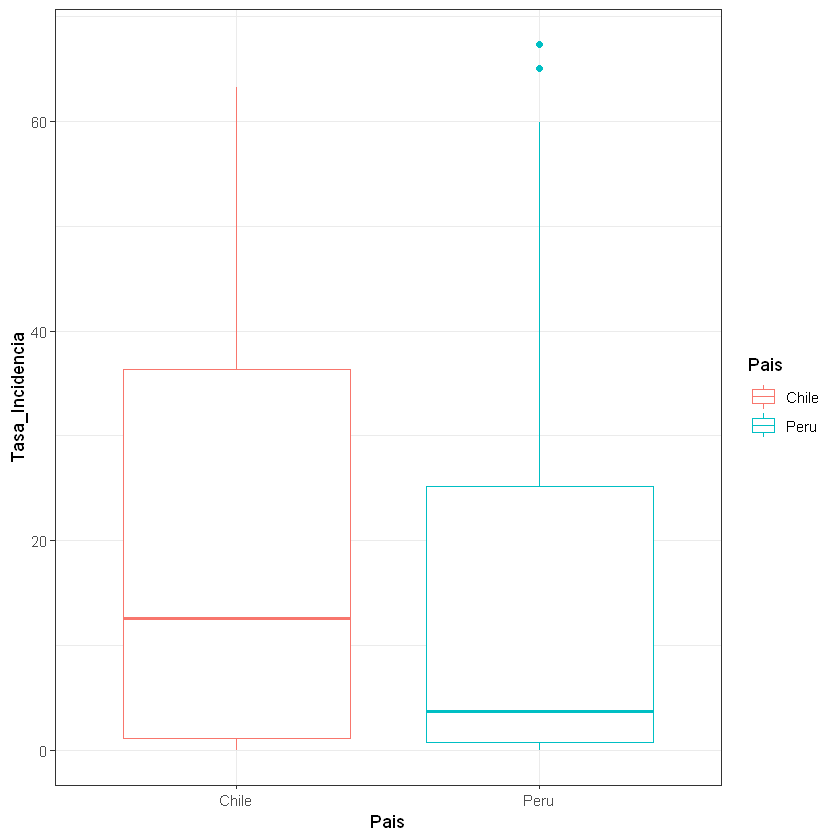

In [26]:
ggplot(data = df_final[df_final$Pais == "Chile" | df_final$Pais=='Peru',], aes(x= Pais, y= Tasa_Incidencia, color = Pais)) + 
  geom_boxplot() +
  theme_bw()

Utilizando la funcion t.test efectuamos el test de diferencia de medias.


In [27]:
t.test(x = df_final[df_final$Pais == "Peru",]$Tasa_Incidencia,
       y = df_final[df_final$Pais == "Chile", ]$Tasa_Incidencia,
       alternative = "two.sided", mu = 0, var.equal = TRUE, conf.level = 0.95 )


	Two Sample t-test

data:  df_final[df_final$Pais == "Peru", ]$Tasa_Incidencia and df_final[df_final$Pais == "Chile", ]$Tasa_Incidencia
t = -1.1158, df = 97, p-value = 0.2673
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -12.794774   3.585972
sample estimates:
mean of x mean of y 
 15.23691  19.84131 


Con los valores obtenidos podemos concluir segun los 3 principios:

1. Podemos ver que el valor del estadistico en valor absouto es z =1.1158 como tenemos un n grande (df = 97) podemos contrastar nuestro estadístico contra el valor de una N(0,1). Para un α=0.05, tenemos que:

In [28]:
alpha = 0.05
z_alpha = qnorm(1-alpha/2) #Como es un test de dos colas dividimos alpha en dos
print(z_alpha)

[1] 1.959964


Luego, observamos que $|z|<z_{alpha}$, es decir, 1.116<1.96. Por lo cual, NO rechazamos la hipótesis nula de que la media de la tasa de incidencia diaria en Chile es igual a la tasa de incidencia diaria en Peru.

2. Si analizamos el intervalo de confianza notamos que con un 95% de confianza podemos decir que la diferencia en la media de la tasa de incidencia diaria entre Chile y Peru se mueve en el rango de $[-12.794774,3.585972]$. Como este intervalo SI contiene al 0, entonces podemos afirmar que NO se rechaza la hipótesis nula.

3. Finalmente si analizamos a traves de P-valor podemos notar que el obtenido $p−value=0.2673>α$ entonces a traves de este metodo tampoco podemos rechazar la hipótesis nula.

### Test 2: Argentina - Bolivia. Realizaremos el siguiente test.

$$H_{0}: \bar{X}_{Arg} = \bar{X}_{Bol}\\
  H_{A}: \bar{X}_{Arg} \neq \bar{X}_{Bol}$$

Hacemos un diagrama de caja para visualizar los datos a estudiar en el test de diferencia de medias

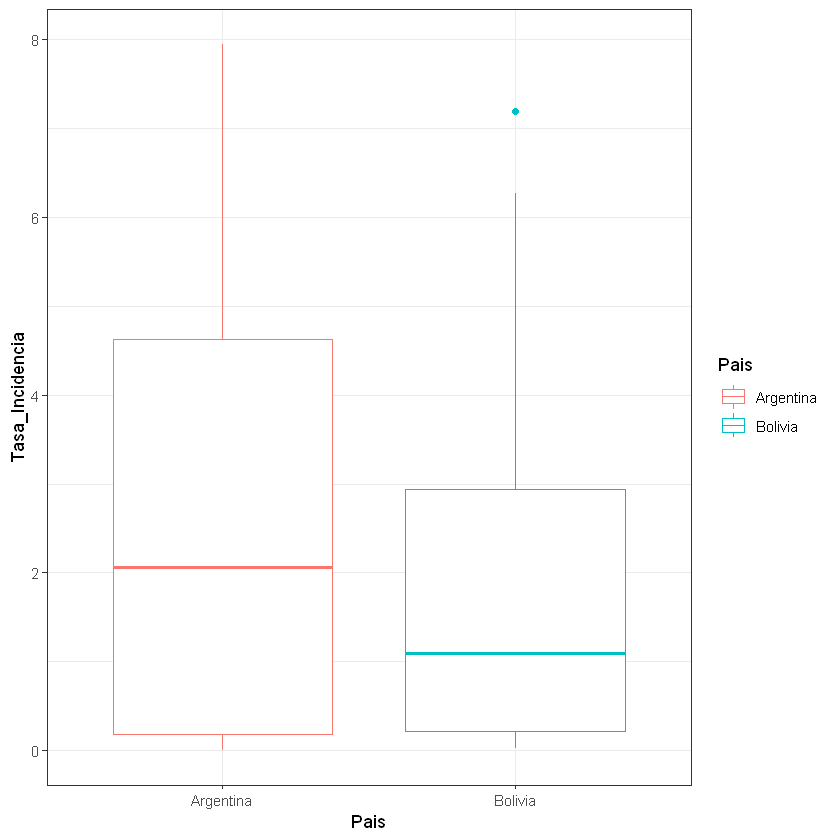

In [29]:
ggplot(data = df_final[df_final$Pais == "Argentina" | df_final$Pais=='Bolivia',], aes(x= Pais, y= Tasa_Incidencia, color = Pais)) + 
  geom_boxplot() +
  theme_bw()

Utilizamos la función t.test

In [30]:
t.test(x = df_final[df_final$Pais == "Argentina",]$Tasa_Incidencia,
       y = df_final[df_final$Pais == "Bolivia", ]$Tasa_Incidencia,
       alternative = "two.sided", mu = 0, var.equal = TRUE, conf.level = 0.95)


	Two Sample t-test

data:  df_final[df_final$Pais == "Argentina", ]$Tasa_Incidencia and df_final[df_final$Pais == "Bolivia", ]$Tasa_Incidencia
t = 1.6796, df = 93, p-value = 0.0964
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1420672  1.7003860
sample estimates:
mean of x mean of y 
 2.626322  1.847163 


Con los valores obtenidos podemos concluir segun los 3 principios:

1. Podemos ver que el valor del estadistico en valor absouto es z = 1.6796, como tenemos un n grande (df = 95) podemos contrastar nuestro estadístico contra el valor de una N(0,1). Para un α=0.05, tenemos que:

In [31]:
alpha = 0.05
z_alpha = qnorm(1-alpha/2) #Como es un test de dos colas dividimos alpha en dos
print(z_alpha)

[1] 1.959964


Luego, observamos que $z<z_{alpha}$, es decir, 1.6796<1.96. Por lo cual, NO rechazamos la hipótesis nula de que la media de la tasa de incidencia diaria en Argentina es igual a la tasa de incidencia diaria en Bolivia.

2. Si analizamos el intervalo de confianza notamos que con un 95% de confianza podemos decir que la diferencia en la media de la tasa de incidencia diaria entre Argentina y Bolivia se mueve en el rango de $[-0.142067 ,1.7003860]$. Como este intervalo SI contiene al 0, entonces podemos afirmar que NO se rechaza la hipótesis nula.

3. Finalmente si analizamos a traves de P-valor podemos notar que el obtenido $p−value=0.0964>α$ entonces a traves de este metodo tampoco podemos rechazar la hipótesis nula.

### Conclusiones

Como conclusion de ambos test de hipoteis se puede afirmar que la diferencia entre las medias de las tasas de incidencia acumulada entre Chile - Peru y Argentina - Bolivia no son estadísticamente significativas, por lo que se concluye que con un 95% de confianza las medias de las tasas de incidencia acumulada entre Chile y Peru son iguales, de la misma forma en que ocurre entre Argentina y Bolivia. 

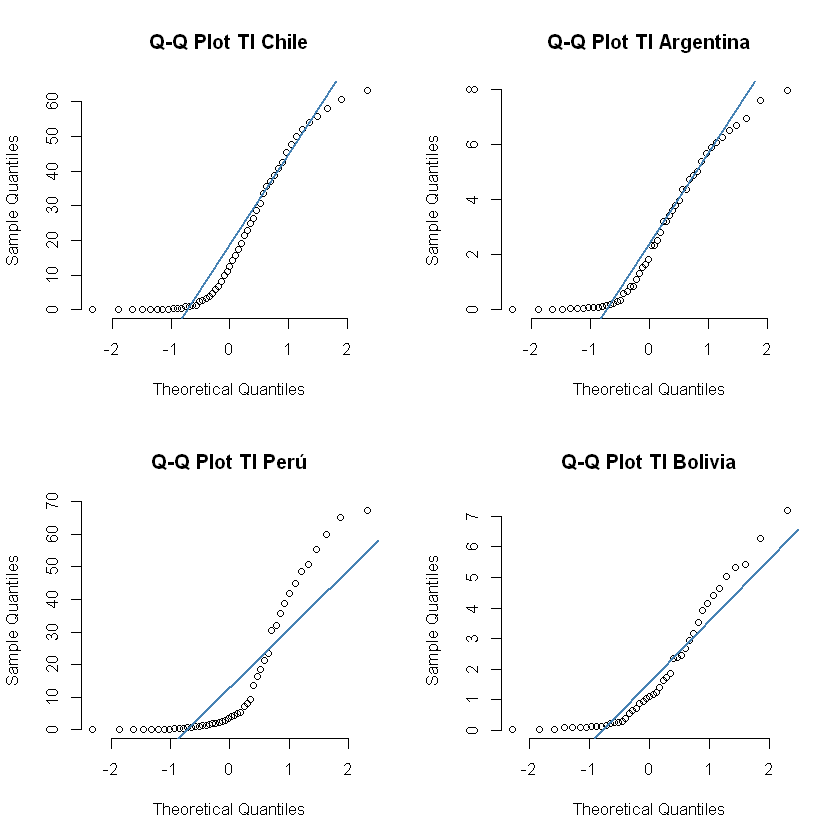

In [32]:
par(mfcol=c(2,2))
qqnorm(df_chi$Tasa_Incidencia, pch = 1 , frame = FALSE,main='Q-Q Plot TI Chile') 
qqline(df_chi$Tasa_Incidencia, col = "steelblue", lwd = 2)

qqnorm(df_per$Tasa_Incidencia, pch = 1 , frame = FALSE,main='Q-Q Plot TI Perú')
qqline(df_per$Tasa_Incidencia, col = "steelblue", lwd = 2)

qqnorm(df_arg$Tasa_Incidencia, pch = 1 , frame = FALSE,main='Q-Q Plot TI Argentina')
qqline(df_arg$Tasa_Incidencia, col = "steelblue", lwd = 2)

qqnorm(df_bol$Tasa_Incidencia, pch = 1 , frame = FALSE,main='Q-Q Plot TI Bolivia')
qqline(df_bol$Tasa_Incidencia, col = "steelblue", lwd = 2)


Anteriormente, para poder realizar los test de hipótesis hicimos el supuesto de que la variable, en este caso la tasa de incidencia acumulada se comportaba de forma normal.

Podemos observar en los QQ-plots que las variables utilizadas anteriormente no tienden a comportarse como una normal, ya que los puntos no se ajustan a la recta teórica de distribución normal, desde la perspectiva de los cuartiles. Por lo tanto las conclusiones obtenidas bajo los test de hipótesis están sesgadas bajo esta información adicional, ya que, efectivamente no existe un comportamiento normal de parte de la variable. De igual forma, para estar más seguro de esto se podrían aplicar test de normalidad a la tasa de inciencia acumulada para comprobar más en profunidad las conclusiones.

Además, se pudo observar en los diagramas de cajas de las tasas de incidencia, una variabilidad no menor de los datos, lo que nos puede llevar de forma no muy certera a considerar que no son significativas las diferencias.


### Pregunta 2.2

### Test de diferencia de proporciones

Buscamos realizar dos test de diferencia de proporciones para la tasa de mortalidad entre Chile-Peru y Argentina-Bolivia a un nivel de significancia del 95%. Para ello definiremos primero la tasa de mortalidad acumulada como el cociente entre fallecidos y poblacion total por cada 100.000 habitantes, la cual se encuentra en su forma acumulada en la ultima columna de nuestro Data frame.

Calculamos la media y la desviación estándar de la tasa de mortalidad acumulada por cada país

In [33]:
df_final %>% 
  group_by(Pais) %>% 
  summarize(mean_mortalidad= mean(Tasa_Mortalidad),
            std_mortalidad = sd(Tasa_Mortalidad))

Pais,mean_mortalidad,std_mortalidad
<fct>,<dbl>,<dbl>
Argentina,0.1069711,0.1195655
Bolivia,0.1135283,0.1263523
Chile,0.2122184,0.2797539
Peru,0.3981049,0.5451754


### Test 1: Chile - Perú

Para el test de proporciones de Chile y Perú, vamos a comparar la tasa de mortalidad cada 100.000 habitantes, que es equivalente, a la proporción de fallecidos sobre la población cada 100.000 habitantes.

Trabajamos con la tasa de mortalidad por país

In [34]:
m_chi <-  df_chi$Tasa_Mortalidad
m_per <-  df_per$Tasa_Mortalidad

n_chi <- length(m_chi)
n_per <- length(m_per)

print(paste("n Chile: ", n_chi))
print(paste("n Peru: ", n_per))

[1] "n Chile:  51"
[1] "n Peru:  48"


## El test que realizaremos es el siguiente:


$$
\left\{
\begin{array}{ll}
H_{0}: &  p_{chi}=p_{per}\\
H_{A}: & p_{chi}\neq p_{per}
\end{array}
\right.
$$

El estadístico que necesitamos construir para el test es:
$$
Z = \frac{\hat{p}_{chi} - \hat{p}_{per}}{\sqrt{Var(\hat{p}_{chi} - \hat{p}_{per})}}
$$

Y bajo la hipótesis nula, la varianza de la diferencia de proporciones es:
$$
 Var(\hat{p}_{chi} - \hat{p}_{per})= \hat{p}_{chi}(100000-\hat{p}_{per})(\frac{1}{n_{chi}}+\frac{1}{n_{per}})
$$

Este resultado los obtenemos bajo $H_{0}$, donde se supone que $\hat{p}_{chi}=\hat{p}_{per} = \hat{p}$, por lo que $\hat{p}$ lo estimamos como:

\begin{equation*}
    \hat{p} = 100.000 \cdot \frac{X_{chi}+X_{per}}{n_{chi}+n_{per}}
\end{equation*}

Obs:
- $\hat{P}_{per} = 1-\hat{P}_{chi}$, pero como estamos considerando la tasa de mortalidad cada 100.000 habitantes, se tiene $\hat{P}_{per} = 100000-\hat{P}_{chi}$
- $X_{chi},X_{per}$ = Cantidad de fallecidos en cada país

In [35]:
p_chi <- tail(df_chi$Tasa_Mortalidad,n=1)
n_chi <- pob_chi

p_per <- tail(df_per$Tasa_Mortalidad,n=1)
n_per <- pob_per

print(paste('P_chi: ',p_chi))
print(paste('P_per: ',p_per))

[1] "P_chi:  0.894219487715017"
[1] "P_per:  1.97314776200228"


* $\hat{P}_{chi}$ = 0.894 fallecidos por 100.000 habitantes
* $\hat{P}_{per}$ = 1.973 fallecidos por 100.000 habitantes

Calculemos entonces $\hat{p}$ con los datos que poseemos:

In [36]:
x_chi <- tail(df_chi$Muertos,n=1)
x_per <- tail(df_per$Muertos,n=1)

p_hat <- 100000*((x_chi+x_per)/(n_chi+n_per))
print(paste('P_hat: ',p_hat))

[1] "P_hat:  1.56620380304522"


Luego, la desviación estándar para el estadístico es:

In [37]:
SE_p <- sqrt(p_hat*(100000-p_hat)*((1/n_chi)+(1/n_per)))
print(paste("SE de p_hat: ", SE_p))

[1] "SE de p_hat:  0.113680217550699"


Entonces, el valor de nuestro estadístico es de:

In [38]:
Z <- (p_chi-p_per)/SE_p
print(paste("Z : ", Z))

[1] "Z :  -9.49090613594301"


In [39]:
print(paste('n_chi:',n_chi))
print(paste('n_per:',n_per))

[1] "n_chi: 19458310"
[1] "n_per: 32131400"


Como tenemos un n grande, dado que estamos considerando la población podemos contrastar nuestro estadístico contra el valor de una $\mathcal{N}$(0,1). Para un α=0.05, tenemos que:

In [40]:
alpha = 0.05
z_alpha = qnorm(1- alpha/2)
print(paste("Z_alpha :", z_alpha))

[1] "Z_alpha : 1.95996398454005"


Observamos que $|Z|>Z_{alpha}$ por lo cual existe evidencia estadística que permite rechazar la hipótesis nula de que la tasa de mortalidad sea igual entre Chile y Perú. En otras palabras, existen diferencias significativas de la tasa de mortalidad entre Chile y Perú.

### Test 2: Argentina - Bolivia

Análogo al test anterior, planteamos el mismo procedimiento.

$$
\left\{
\begin{array}{ll}
H_{0}: &  p_{arg}=p_{bol}\\
H_{A}: & p_{arg}\neq p_{bol}
\end{array}
\right.
$$

El estadístico que necesitamos construir para el test es:
$$
Z = \frac{\hat{p}_{arg} - \hat{p}_{bol}}{\sqrt{Var(\hat{p}_{arg} - \hat{p}_{bol})}}
$$

Y bajo la hipótesis nula, la varianza de la diferencia de proporciones es:
$$
 Var(\hat{p}_{arg} - \hat{p}_{bol})= \hat{p}_{arg}(100000-\hat{p}_{bol})(\frac{1}{n_{chi}}+\frac{1}{n_{bol}})
$$

Este resultad
o los obtenemos bajo $H_{0}$, donde se supone que $\hat{p}_{arg}=\hat{p}_{bol} = \hat{p}$, por lo que $\hat{p}$ lo estimamos como:

\begin{equation*}
    \hat{p} = 100.000 \cdot \frac{X_{arg}+X_{bol}}{n_{arg}+n_{bol}}
\end{equation*}

Obs: $\hat{P}_{arg} = 1-\hat{P}_{bol}$, pero como estamos considerando la tasa de mortalidad cada 100.000 habitantes, se tiene $\hat{P}_{arg} = 100000-\hat{P}_{bol}$

In [41]:
p_arg <- tail(df_arg$Tasa_Mortalidad,n=1)
n_arg <- pob_arg

p_bol <- tail(df_bol$Tasa_Mortalidad,n=1)
n_bol <- pob_bol

print(paste('P_arg: ',p_arg))
print(paste('P_bol: ',p_bol))

[1] "P_arg:  0.387863717824033"
[1] "P_bol:  0.392296718972896"


* $\hat{P}_{arg}$ = 0.388 fallecidos por 100.000 habitantes
* $\hat{P}_{bol}$ = 0.392 fallecidos por 100.000 habitantes

Calculemos entonces $\hat{p}$ con los datos que poseemos:

In [42]:
x_arg <- tail(df_arg$Muertos,n=1) #Cantidad fallecidos argentina
x_bol <- tail(df_bol$Muertos,n=1) #Cantidad fallecidos bolivia

p_hat2 <- 100000*((x_arg+x_bol)/(n_arg+n_bol))

print(paste('P_hat2: ',p_hat2))

[1] "P_hat2:  0.388742284945515"


Luego, la desviación estándar para el estadístico es:

In [43]:
SE_p2 <- sqrt((p_hat2*(100000-p_hat2))*((1/n_arg) + (1/n_bol)))
print(paste("SE de p_hat: ", SE_p2))

[1] "SE de p_hat:  0.0657468181933669"


Entonces, el valor de nuestro estadístico es de:

In [44]:
Z2 <- (p_arg-p_bol)/SE_p2
print(paste("Z : ", Z2))

[1] "Z :  -0.0674253335853528"


In [45]:
print(paste('n_arg:',n_arg))
print(paste('n_bol:',n_bol))

[1] "n_arg: 45376763"
[1] "n_bol: 11216000"


Como tenemos un n grande, dado que estamos considerando la población podemos contrastar nuestro estadístico contra el valor de una $\mathcal{N}$(0,1). Para un α=0.05, tenemos que:

In [46]:
alpha = 0.05
z_alpha = qnorm(1 - alpha/2)
print(paste("Z_alpha :", z_alpha))

[1] "Z_alpha : 1.95996398454005"


Observamos que $|Z|\ngeqslant Z_{alpha}$, por lo cual NO existe evidencia estadística que nos permita rechazar la hipótesis nula, de que la tasa de mortalidad entre Argentina y Bolivia sean iguales. En otras palabras no es posible concluir que exista una diferencia de proporcion de fallecidos cada 100.000 habitantes entre Argentina y Bolivia.

## Conclusiones

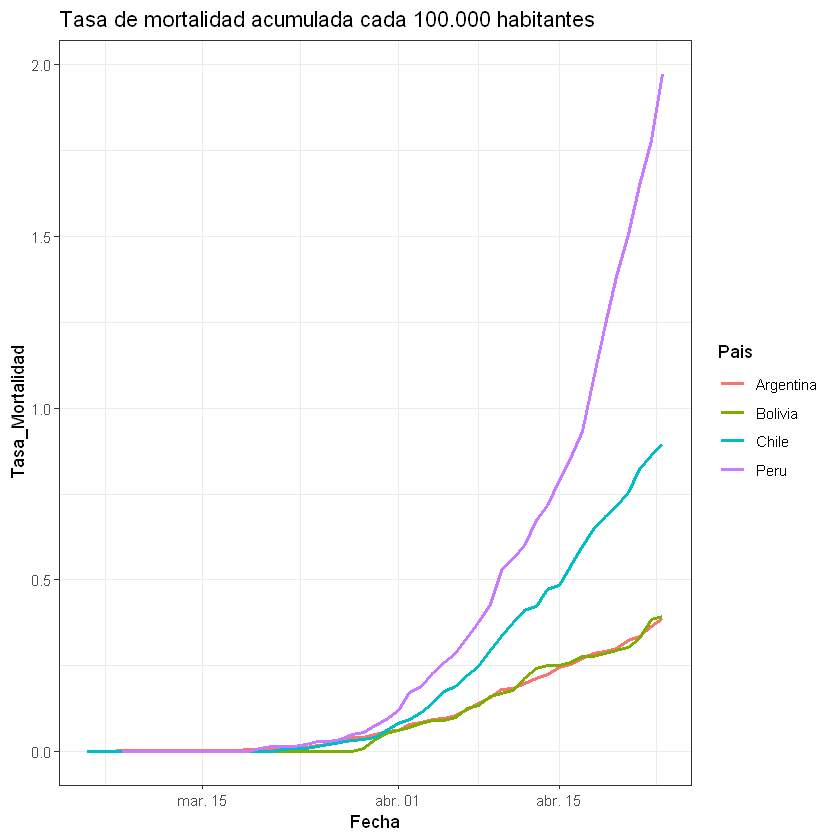

In [47]:
grap <- ggplot(df_final) + geom_line(aes(x =Fecha, y = Tasa_Mortalidad, col = Pais), size=1, alpha = 1) + 
                                                                                    ggtitle("Tasa de mortalidad acumulada cada 100.000 habitantes") + theme_bw()
grap

Con respecto al test de proporciones entre Chile y Perú, es de esperarse la diferencia entre la proprorción de fallecidos cada 100.000 habitantes. Se puede observar en el gráfico de arriba que la tasa de mortalidad de Perú desde abril ha comenzado un aumento mucho mas fuerte que Chile, lo que efectivamente conlleva a una mayor cifra de fallecidos. Además Chile posee una diferencia considerable de habitantes con respecto a Perú lo que influencia directamente el cálculo de la proporción.

Con respecto al test de proporciones entre Argentina y Bolivia, es de esperarse que no exista una diferenia significativa entre la tasa de mortalidad de ambos países. Asimismo se puede observar en el gráfico de arriba que el comportamiento de sus tasas es muy similar. Como se sabe Argentina tiene mas de 4 veces la población de Bolivia lo que indica que efectivamente Argentina, lamentablemente ha precentado una mayor cantidad de decesos con respecto a Bolivia. También con respecto a la evolución de contagios, Argentina presenta más confirmados que Bolivia, lo que puede explicar en parte esta proporción. 

Además es sabido que no todos los países consideran de igual forma un deceso producto de Coronavirus, por lo que puede existir un sesgo importante en la cantidad de fallecidos por los países y en este caso no se esta considerando esta información. Asimismo realizamos ambos test bajo el supuesto de que los fallecidos venian de la misma muestra, lo que en la practica no es así, ya que estamos comparando naciones distintas, lo que sesga aún más la información.

### Test de ANOVA para la Tasa de Incidencia

Realizaremos un test ANOVA de una via para comparar la media de la Tasa de Incidencia Acumulada de los 4 paises escogidos.

Para comenzar visualizemos los datos con un gráfico de boxplot ajustandolos a la misma cantidad de muestras por pais (45 muestras)


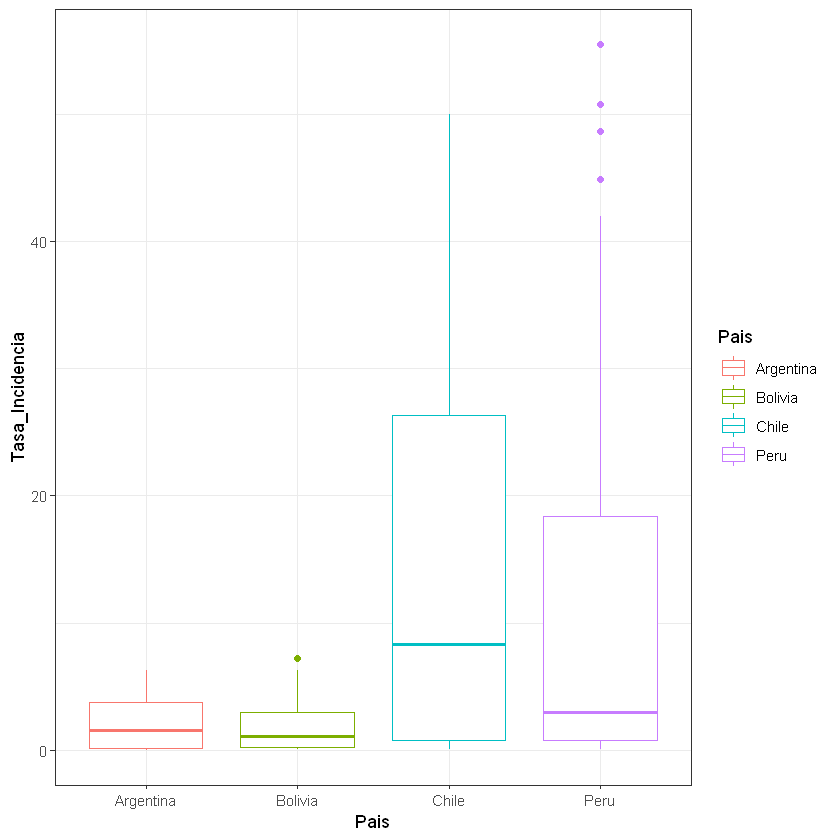

In [48]:
df_anova <- df_final[df_final$Dias < 46, ]
ggplot(data = df_anova, aes(x= Pais, y= Tasa_Incidencia, color = Pais)) + 
  geom_boxplot() +
  theme_bw()

A priori esperariamos encontrar diferencias entre las medias, ya que como se Observa Chile posee una media mucho mayor al resto de países.

Compararemos las medias de las Tasas de Incidencia acumuladas en estos 4 Paises. Por lo cual en este caso $I=4$. Y para cada categoría tenemos 45 observaciones. Entonces $J=45$. Recordemos que el modelo de ANOVA es el siguiente:
$$
Y_{ij}=μ+α_{i}+ϵ_{ij}
$$

Donde $Y_{ij}$ es la observación de la persona $j$ en el grupo $i$, $μ$ es la media poblacional de donde provienen todas las observaciones, $α_{i}$ es el efecto que existe por pertenecer al grupo $i$ y en $ϵ_{ij}$ dejamos todo aquello que no podemos observar, toda la variabilidad entre las observaciones que no es explicada por los factores de nuestro modelo (es un error aleatorio).

In [49]:
anova_df <- aov(df_anova$Tasa_Incidencia~df_anova$Pais)
summary(anova_df)

               Df Sum Sq Mean Sq F value   Pr(>F)    
df_anova$Pais   3   6065  2021.8   14.88 1.13e-08 ***
Residuals     176  23922   135.9                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

De lo anterior podemos extraer lo siguiente:

$>$El valor de SSB es 6065

$>$El estimador insesgado de la varianza intergrupo es 2152.7

$>$El valor de SSW es 23922

$>$El estimador insesgado de la varianza intragrupo es 135.9

Con estos valores, se construye el estadístico del test, el cual es:
$$
F=\frac{SSB/(I - 1)}{SSW/I(J-1)}=14.88
$$

Ademas, se nos entrega el p-valor del test de hipotesis, el cual es $1.13*10^{-8}$ valor que se aproxima a cero, por lo tanto a un nivel de significancia del $5\%$ se $rechaza$ la hipotesis nula del ANOVA, esto quiere decir que $\textbf{AL MENOS UNA DE LAS MEDIAS}$ es distinta de las otras significativamente y por lo observado en el grafico de boxplot se puede deducir que al menos es la de Chile y potencialmente la de Peru tambien.

Para comprobar lo anterior, considerando ademas que la realizacion del test de diferencia de medias entre Argentina y Bolivia no fue rechazado ni tampoco el test entre Chile y Peru, realizaremos un test de diferencia de medias entre Bolivia y Chile y otro entre Peru y Argentina.

Test de diferencia de medias de la tasa de incidencia acumulada entre Bolivia y Chile:
$$H_{0}: \bar{X}_{Bol} = \bar{X}_{Chi}\\
  H_{A}: \bar{X}_{Bol} \neq \bar{X}_{Chi}$$

In [50]:
t.test(x = df_final[df_final$Pais == "Bolivia",]$Tasa_Incidencia,
       y = df_final[df_final$Pais == "Chile", ]$Tasa_Incidencia,
       alternative = "two.sided", mu = 0, var.equal = TRUE, conf.level = 0.95)


	Two Sample t-test

data:  df_final[df_final$Pais == "Bolivia", ]$Tasa_Incidencia and df_final[df_final$Pais == "Chile", ]$Tasa_Incidencia
t = -5.8692, df = 94, p-value = 6.536e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -24.0815 -11.9068
sample estimates:
mean of x mean of y 
 1.847163 19.841314 


Efectivamente como tenemos un $p-value<\alpha$ podemos rechazar la Hipótesis nula de que las medias de tasa de incidencia acumulada entre Bolivia y Chile sean iguales. Por lo que existe evidencia estadística que nos permiten decir que existe una diferencia significativa entre la media de tasa de incidencia entre Bolivia y Chile.

Ahora consideramos el siguiente test de diferencia de medias de tasa de incidencia acumulada.
$$H_{0}: \bar{X}_{Per} = \bar{X}_{Arg}\\
  H_{A}: \bar{X}_{Per} \neq \bar{X}_{Arg}$$

In [51]:
t.test(x = df_final[df_final$Pais == "Peru",]$Tasa_Incidencia,
       y = df_final[df_final$Pais == "Argentina", ]$Tasa_Incidencia,
       alternative = "two.sided", mu = 0, var.equal = TRUE, conf.level = 0.95)


	Two Sample t-test

data:  df_final[df_final$Pais == "Peru", ]$Tasa_Incidencia and df_final[df_final$Pais == "Argentina", ]$Tasa_Incidencia
t = 4.3024, df = 96, p-value = 4.067e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  6.792458 18.428723
sample estimates:
mean of x mean of y 
15.236913  2.626322 


De igual forma tenemos un $p-value<\alpha$ por lo que podemos rechazar la hipótesis nula y podemos decir que existen diferencias significativas entre las medias de tasa de incidencia acumulada entre Perú y Argentina

Por lo tanto se puede comprobar lo que concluimos gracias al test de ANOVA.

Como vision general a los países testeados se tiene que Argentina es el país de la muestra con mayor capacidad de diversa índole en el área de salud (camas, médicos, ventiladores) y además con normas bastante restrictivas desde un comienzo para la población. También es importante considerar que su densidad poblacional es mucho menor que la de Chile y Perú. Además Perú ha sido el que ha tenido el mayor aumento explosivo de casos, por lo que es esperable la diferencia.

En el caso de Bolivia influye la naturaleza del país. Su población es la menor dentro de los 4 países analizados, pero más importante aún, la densidad poblacional del país es la menor de todas. Lo anterior sumado a las medidas restrictivas tomadas drásticamente en el país han ayudado a que la media se su tasa de incidencia sea menor.Además, no podemos dejar de considerar por un lado las medidas y formas en que estas se han tomado en el caso de Chile (nombradas anteriormente) y la dificultad que ha traído el contexto de los ciudadanos peruanos para la aplicación de estas normas en el caso de Perú. 

Si bien todos los países testeados son vecinos y de culturas similares, las capacidades de sus sistemas de salud y el cómo se han enfrentado a las medidas sanitarias tiene una influencia importante en los datos, que en este caso no se están considerando y por tanto influyen en un sesgo de información.